In [1]:
#from time import time                                      # various time-related functions
#import os                                                  # portable way of using operating system dependent functionality
import numpy as np                                         # contains multidimensional array and matrix data structures
import matplotlib.pyplot as plt                            # data visualization library for plots, graphs and charts
#%matplotlib inline
#from six.moves import urllib                               # imports a mixture of urllib, urllib2 and urlparse with Python2
import cv2 as cv

In [2]:
# this library is for downloading the overlay to the board
from pynq_dpu import DpuOverlay
# this line will be used later when we want to use the RGB LED Stick
from pynq_peripherals import PmodGroveAdapter
# downloading the overlay to the board
overlay = DpuOverlay("dpu.bit")

In [3]:
#overlay.load_model("textmountain_pt.xmodel")
overlay.load_model("ocr_pt.xmodel")

In [4]:
# creates a runner instance that has a number of member functions to control 
# the execution and get the input and output tensors
dpu = overlay.runner

# get the input and output tensors
inputTensors = dpu.get_input_tensors()
outputTensors = dpu.get_output_tensors()

# define the required input and output shapes of the data being put into and received from the model
shapeIn = tuple(inputTensors[0].dims)
shapeOut = tuple(outputTensors[0].dims)
outputSize = int(outputTensors[0].get_data_size() / shapeIn[0])

# create a new array of given shape and type, without initializing entries
softmax = np.empty(outputSize)

In [5]:
print("Shape in: " + str(shapeIn))
print("Shape out: " + str(shapeOut))
print("Output Size: " + str(outputSize))

Shape in: (1, 960, 960, 3)
Shape out: (1, 240, 240, 2)
Output Size: 115200


(1200, 1600, 3)


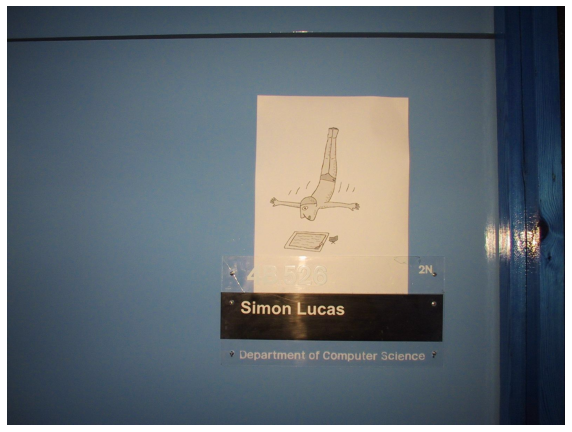

In [6]:
img = cv.imread('sample_photos/SimonLucas.jpg')
plt.figure(figsize=(10, 10)), plt.axis("off"), plt.imshow(img);
print(img.shape)

In [7]:

def plot_images(original_image, processed_image):
    plt.figure(figsize=(15, 15))
    plt.subplot(121),plt.imshow(original_image),plt.title('Original')
    plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(processed_image),plt.title('Processed')
    plt.xticks([]), plt.yticks([])
    plt.show()

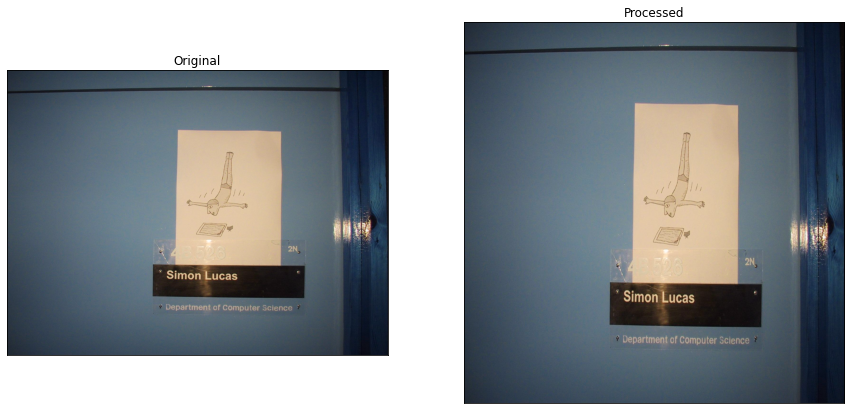

Size of original image:  (1200, 1600, 3)
Size of cropped image:  (960, 960, 3)


In [8]:


cropped_image = cv.resize(img, (960, 960))
plot_images(img, cropped_image)
print("Size of original image: ", img.shape)
print("Size of cropped image: ", cropped_image.shape)

In [9]:
input_data = [np.empty(shapeIn, dtype=np.float32, order="C")]
output_data = [np.empty(shapeOut, dtype=np.float32, order="C")]
image = input_data[0]

image[0,...] = cropped_image.reshape(shapeIn[1:])
job_id = dpu.execute_async(input_data, output_data)
dpu.wait(job_id) 

0

In [10]:
#print(output_data[0][0][0][0]) # dimentions: (1,1,240,240,5)
#print(output_data[0][0][1][1]) 
#print(output_data[0][0][100][100]) 
#print(output_data[0][0][100][100]*255) 

whyme=output_data[0][0][:][:][:]
print(whyme[0][0][:])

[ -9.5 -12.5]


line 0---------------------------
[-17.75 -19.5 ] --- 100/170
[-18.   -23.75] --- 105/170
[-14.   -15.25] --- 110/170
[-16.75 -21.5 ] --- 115/170
[-17.25 -21.5 ] --- 120/170
[-15.75 -21.75] --- 125/170
[-16.75 -22.75] --- 130/170
[-16.5 -23.5] --- 135/170
[-17.   -17.25] --- 140/170
[-16.5 -22.5] --- 145/170
line 1---------------------------
[-19.   -23.75] --- 100/175
[-18.75 -20.5 ] --- 105/175
[-16.   -19.75] --- 110/175
[-16.25 -22.  ] --- 115/175
[-14.25 -18.25] --- 120/175
[-15.75 -19.5 ] --- 125/175
[-15.75 -21.25] --- 130/175
[-15.5 -17. ] --- 135/175
[-16.   -16.25] --- 140/175
[-12.75 -16.  ] --- 145/175
line 2---------------------------
[-18.  -20.5] --- 100/180
[-20.5  -21.25] --- 105/180
[-16.5  -21.75] --- 110/180
[-16.25 -23.5 ] --- 115/180
[-16.25 -20.25] --- 120/180
[-14.   -16.25] --- 125/180
[-17.   -19.25] --- 130/180
[-16.   -17.25] --- 135/180
[-14.75 -19.  ] --- 140/180
[-15.5 -15.5] --- 145/180
line 3---------------------------
[-18.   -21.75] --- 100/185
[-19.5

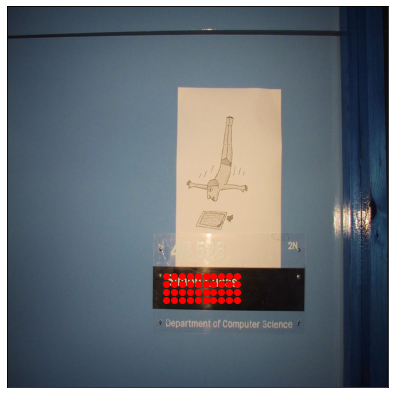

In [19]:
plt.figure(figsize=(15, 15))
plt.subplot(122),plt.imshow(cropped_image)
plt.xticks([]), plt.yticks([])
newline = 0
i = 0
for y in range(170,190,5):
    newline = 1
    for x in range(100,150,5):
        if 1:
        #if whyme[y][x][1] >=0:
            if newline: 
                print("line " + str(i) + "---------------------------")
                newline = 0
                i+=1
            plt.plot(int(x*960/240),int(y*960/240),'ro')
            print(str(whyme[y][x]) + " --- " + str(x) + "/" + str(y))
            

plt.show()




line 0---------------------------
[-13.75 -17.5 ] --- 50/100
[-16.  -16.5] --- 55/100
[-16.5  -21.25] --- 60/100
[-14.  -14.5] --- 65/100
[-16.75 -20.  ] --- 70/100
[-14. -15.] --- 75/100
[-10.75 -14.5 ] --- 80/100
[-14. -15.] --- 85/100
[-16.25 -18.75] --- 90/100
[-18.25 -19.  ] --- 95/100
[-16.25 -17.75] --- 100/100
[-17.75 -16.75] --- 105/100
[-20. -22.] --- 110/100
[-13.75 -13.5 ] --- 115/100
[-11.25 -11.75] --- 120/100
[-14.25 -13.5 ] --- 125/100
[-13.5 -14.5] --- 130/100
[-18.5 -20. ] --- 135/100
[-21.   -22.75] --- 140/100
[-20. -24.] --- 145/100
line 1---------------------------
[-16.   -20.75] --- 50/105
[-17.25 -20.75] --- 55/105
[-16.5  -18.75] --- 60/105
[-19.75 -18.5 ] --- 65/105
[-19.   -20.25] --- 70/105
[-16.5 -18. ] --- 75/105
[ -9.75 -14.75] --- 80/105
[-11.25 -12.  ] --- 85/105
[-15.  -19.5] --- 90/105
[-16.   -20.75] --- 95/105
[-20.5  -26.25] --- 100/105
[-22.5  -24.25] --- 105/105
[-16.   -21.75] --- 110/105
[-12.5 -15. ] --- 115/105
[-11.25 -14.  ] --- 120/105
[-

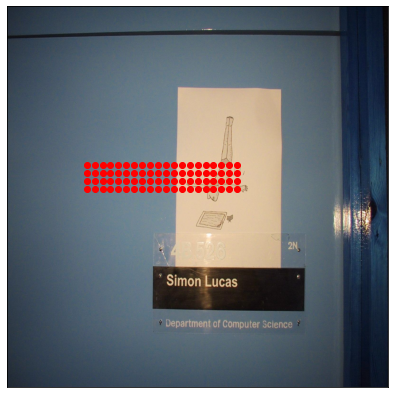

In [21]:
plt.figure(figsize=(15, 15))
plt.subplot(122),plt.imshow(cropped_image)
plt.xticks([]), plt.yticks([])
newline = 0
i = 0
for y in range(100,120,5):
    newline = 1
    for x in range(50,150,5):
        if 1:
        #if whyme[y][x][1] >=0:
            if newline: 
                print("line " + str(i) + "---------------------------")
                newline = 0
                i+=1
            plt.plot(int(x*960/240),int(y*960/240),'ro')
            print(str(whyme[y][x]) + " --- " + str(x) + "/" + str(y))
            

plt.show()

In [12]:
del dpu
del overlay